In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The first half of our EDA focused on understanding the sheer amount of gun violence deaths and injuries in the U.S. We have 2 main data sets and have derived further findings based on the demographic data we accessed through deeper cleaning. 

**NICS - National Instant Criminal Background Check System |  2013-2021**
    
    We will focus on the top 10 states getting permits and how they compare to the states with the most incidents?

    If states with less NICS have more incidents, we should advocate for more background checks etc.

**GVA - Gun Violence Archive |  2013-2018**
    
    We know the general profile of the most common suspect (Age: 29, Gender: Male) 

    How do we engage the suspect profile nationally to address their impact on the victim profile?


**Our next layer would be mapping death/injury incidents in the top 10 states by zip code** to see which areas need immediate policy shifts and the local representation we could reach out to deliver the info.

**Visuals Needed**

    Top 10 Nics States - Clean, Color, Relabel

    Suspect Profile, Victim Profile - ##Complete

    Top 10 Injury States, Top 10 Death States - Start

    Top 5 Injury&Death States (10) Zip Code Maps - Goals


In [2]:
gva_final = pd.read_csv("data/alldata1.csv")
gva_final.head(5)

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105
1,1,1/1/2013,California,Hawthorne,1,3,460726
2,2,1/1/2013,Ohio,Lorain,1,3,478855
3,3,1/5/2013,Colorado,Aurora,4,0,478925
4,4,1/7/2013,North Carolina,Greensboro,2,2,478959


In [3]:
nics = pd.read_csv("data/nics-firearm-background-checks.csv")
nics.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739


In [4]:
demo = pd.read_csv("data/CLEAN_demo.csv")
demo.head(5)

,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
2,478855,25.0,Adult 18+,Subject-Suspect,Male,"Injured, Unharmed, Arrested"
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured


**Clean NICS and Visualize Top 10 States**

In [25]:
nics_copy = nics.copy()
nics_copy["month"]=pd.to_datetime(nics_copy['month'])
nics_copy["year_only"] = pd.to_datetime(nics_copy['month'])
nics_copy["year_only"] = nics_copy['year_only'].dt.strftime('%Y')
nics_copy["year_only"] = nics_copy["year_only"].astype(int)
nics_copy = nics_copy[(nics_copy['year_only'] >= 2013) &
                              (nics_copy['year_only'] <= 2020)]
nics_final = nics_copy.drop(["return_to_seller_other","return_to_seller_long_gun","return_to_seller_handgun",
             "totals", "rentals_handgun","rentals_long_gun","admin",
             'prepawn_handgun', 'prepawn_long_gun','prepawn_other','returned_handgun',
                         'returned_long_gun','returned_other'], axis=1)
nics_final["total"]= nics_final.loc[:,['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other']].sum(axis=1)
nics_final.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12-01,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12-01,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12-01,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12-01,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12-01,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0


In [28]:
state_nics_total = nics_final.groupby(['state','year_only'])[['total']].sum()
state_nics_total

total
state   year_only          
Alabama 2013       563621.0
        2014       621016.0
        2015       737153.0
        2016       616710.0
        2017       477043.0
...                     ...
Wyoming 2016        63493.0
        2017        54578.0
        2018        59995.0
        2019        61201.0
        2020        91326.0

[440 rows x 1 columns]

In [32]:
state_nics_total = nics_final.groupby(['state'])[['total']].sum().sort_values(by='total', ascending=False)
state_nics_total.head(10)
state_nics_ten = state_nics_total.head(10)
state_nics_ten

,total
state,
Kentucky,27967381.0
Illinois,22633346.0
Texas,13306988.0
California,12672496.0
Florida,10227652.0
Indiana,8865863.0
Pennsylvania,8542869.0
Ohio,5981351.0
Tennessee,5581030.0


<AxesSubplot:xlabel='state'>

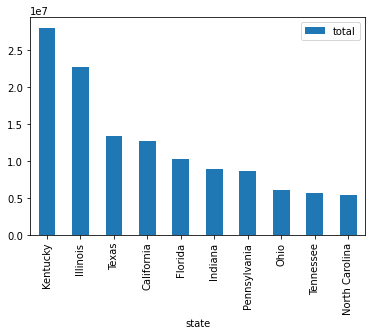

In [37]:
state_nics_ten.plot.bar()

<AxesSubplot:ylabel='state'>

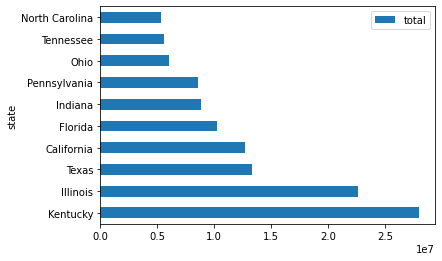

In [40]:
state_nics_ten.plot.barh()

In [ ]:
**